In [1]:
import pandas as pd
import seaborn as sns
import numpy as npz
from config import *
import matplotlib.pyplot as plt
from N_plotting_utils import *

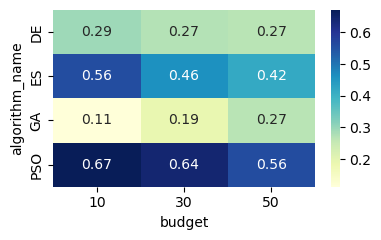

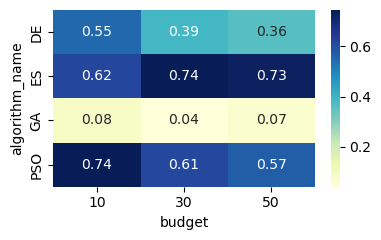

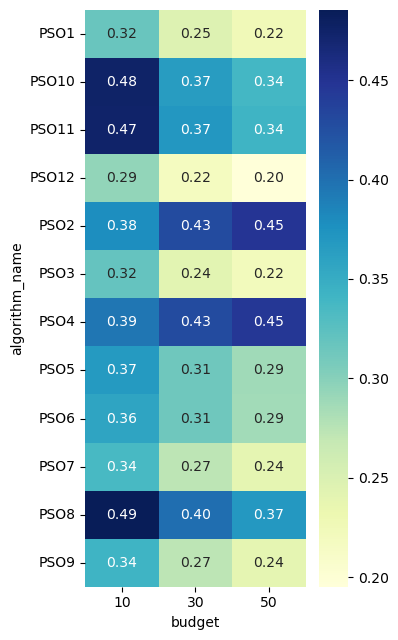

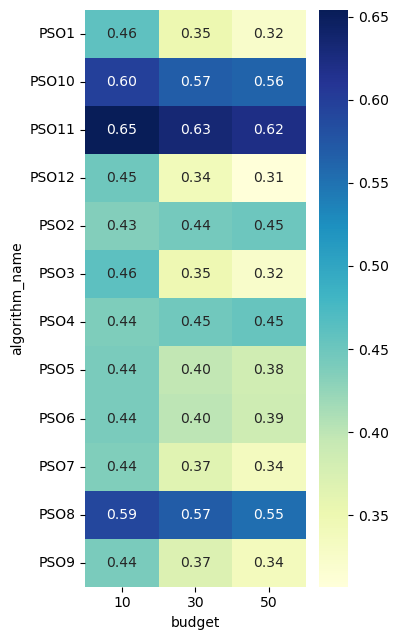

In [9]:

for algorithm_portfolio in ['DE-GA-ES-PSO','PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12']:
    for dimension in [3,10]:
        for sample_count_dimension_factor in [50]:
            algorithm_performance=pd.read_csv(f"{data_dir}/algorithm_performance/random_no_constants_{dimension}d_{algorithm_portfolio}_column_normalized_score.csv",index_col=0)
            selected=pd.read_csv(f"{data_dir}/samples/{sample_count_dimension_factor}d_samples/random_no_constants_{dimension}d_selected.csv")['selected'].unique()
            t=algorithm_performance.loc[list(set(selected).intersection(set(algorithm_performance.index)))]
            best=t.groupby(['algorithm_name','budget']).mean()['algorithm_rank'].reset_index()
            plt.figure(figsize=(4,(len(algorithm_portfolio.split('-'))+1)/2 ))
            sns.heatmap(best.pivot(index='budget', columns='algorithm_name', values='algorithm_rank').T.fillna(0),annot=True,fmt='.2f',cmap='YlGnBu')
            plt.tight_layout()
            #plt.savefig(f'new_data/figures_transformer_selection_random/algorithm_performance/{algorithm_portfolio}_dim_{dimension}_samples_{sample_count_dimension_factor}d.pdf')
            plt.show()